In questo file vado ad analizzare tramite PCA la dimensionalità del dataset _semeion.csv_ per andae a trovare il numero ottimale di cluster.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time as time
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

In [14]:
# load data
df = pd.read_csv('semeion.csv', sep=' ', usecols=range(0, 256), names=range(0, 256))
df.head()
df.shape

(1593, 256)

In [4]:
# standardizzo i dati ad aver una media di zero e varianza 1
X_std = StandardScaler().fit_transform(df)

In [8]:
# e creo una istanza PCA

pca = PCA(0.10)
principal_component = pca.fit_transform(X_std)
print(pca.n_components_)

2


([<matplotlib.axis.XTick at 0x2929a1dd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

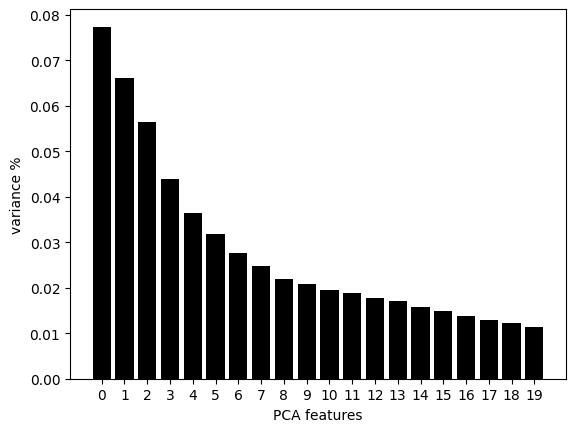

In [95]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

Text(0, 0.5, 'PCA 2')

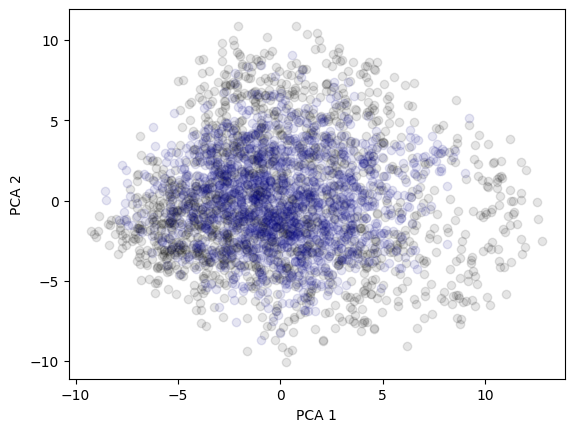

In [85]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principal_component)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.scatter(PCA_components[4], PCA_components[5], alpha=.1, color='navy')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [11]:
ks = range(2, 15)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

NameError: name 'PCA_components' is not defined

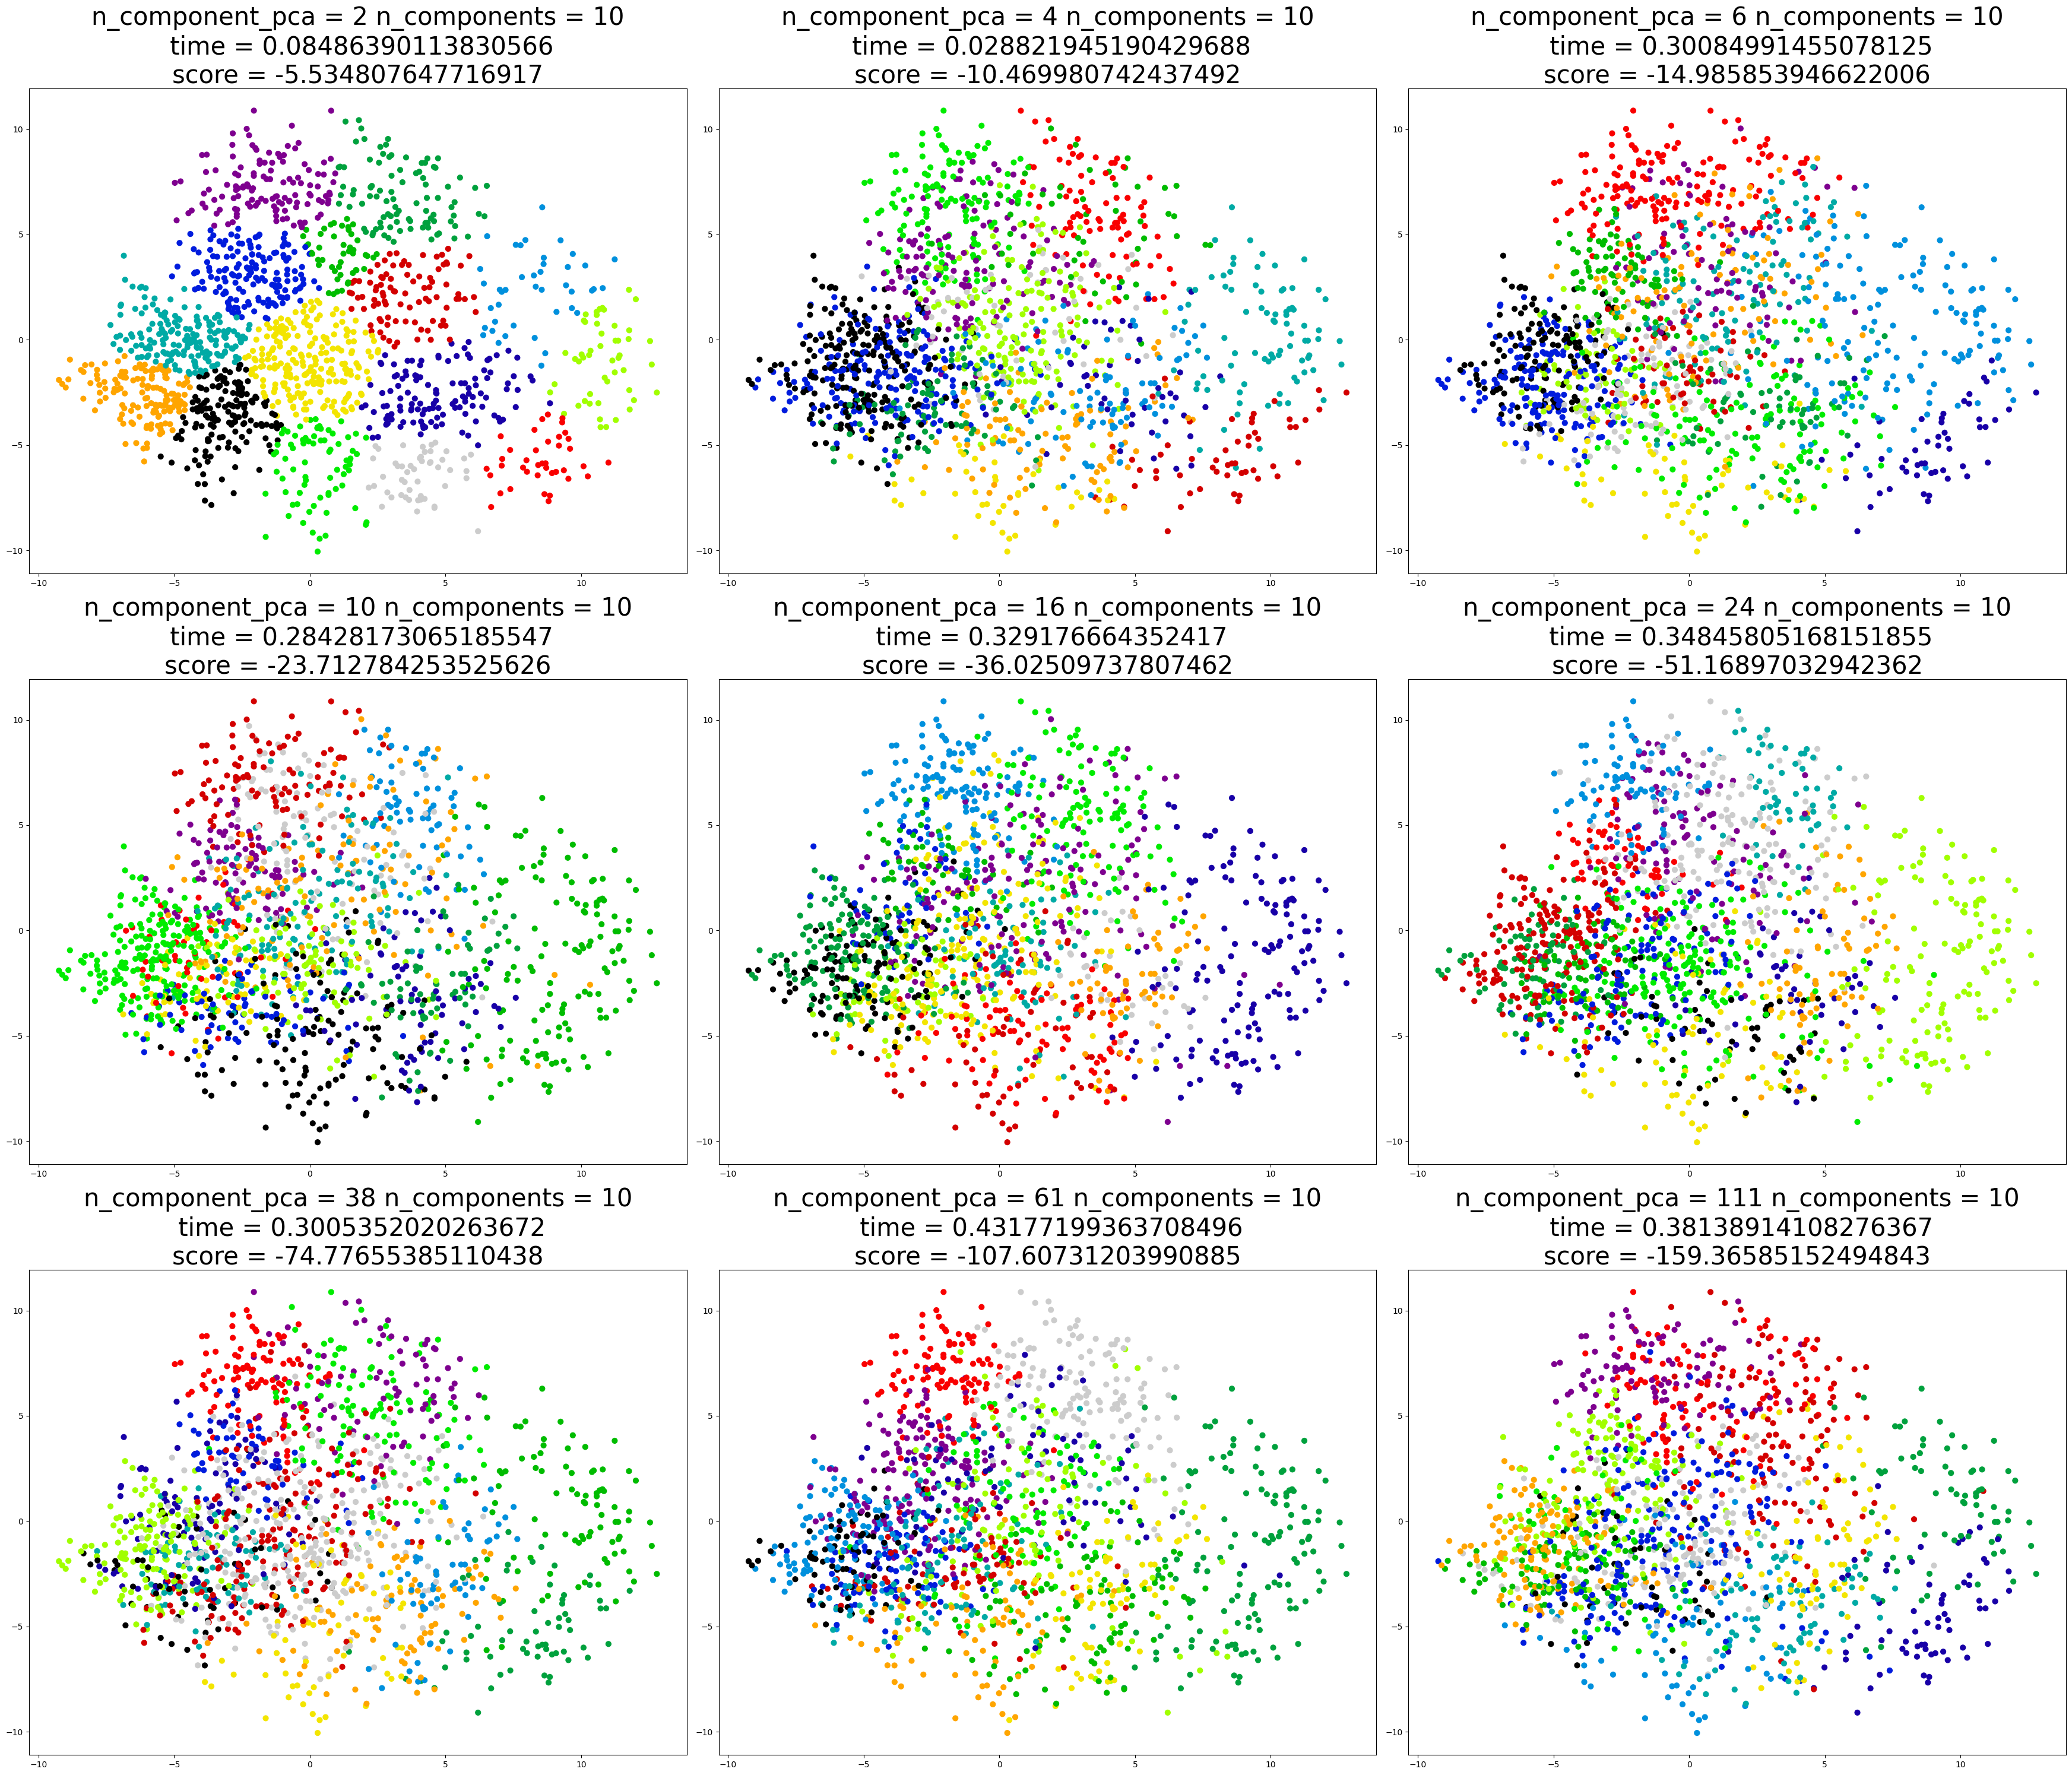

In [10]:
percent_pca = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fig, ax = plt.subplots(3, 3, figsize=(35, 30))
for i in range(len(percent_pca)):
    pca = PCA(percent_pca[i])
    X_pca = pca.fit_transform(X_std)
    start = time.time()
    bgm = GaussianMixture(n_components=15, covariance_type='diag', max_iter=1000, random_state=0)
    bgm.fit(X_pca)
    ax[i // 3, i % 3].scatter(X_pca[:, 0], X_pca[:, 1], c=bgm.predict(X_pca), s=40, cmap='nipy_spectral')
    ax[i // 3, i % 3].set_title(
        'n_component_pca = ' + str(pca.n_components_) + ' n_components = ' + str(10) +
        '\n time = ' + str(time.time() - start) + '\n' + 'score = ' + str(bgm.score(X_pca)), fontsize=30)

plt.tight_layout()
plt.show()

In [ ]:
…